**Import libraries**

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

** Import data**

In [6]:
uploaded= files.upload()

Saving international-airline-passengers.csv to international-airline-passengers.csv


In [7]:

df = pd.read_csv('international-airline-passengers.csv', parse_dates=True,index_col=0)

df=df.sort_index(ascending=0)
# créer des colonnes pour t-1, t-2,t-3,t-4
df['Qt-1'] = df['Quantity'].shift(-1)
df['Qt-2'] = df['Quantity'].shift(-2)
df['Qt-3'] = df['Quantity'].shift(-3)
df['Qt-4'] = df['Quantity'].shift(-4)
df=df.dropna()

print(df.tail())

            Quantity   Qt-1   Qt-2   Qt-3   Qt-4
month                                           
1949-09-01       136  148.0  148.0  135.0  121.0
1949-08-01       148  148.0  135.0  121.0  129.0
1949-07-01       148  135.0  121.0  129.0  132.0
1949-06-01       135  121.0  129.0  132.0  118.0
1949-05-01       121  129.0  132.0  118.0  112.0


**Afficher graph **

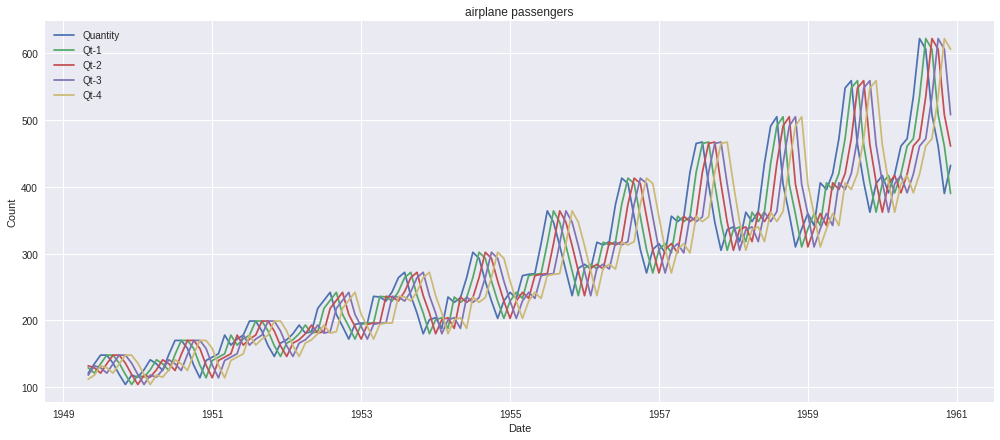

In [8]:
fig, ax = plt.subplots(figsize=(17,7))
df.plot(ax=ax)

#set ticks every week

ax.set_title('airplane passengers')
ax.set_ylabel('Count')
ax.set_xlabel('Date')
plt.show()

# **Créer le modele**

In [0]:
#Convertir les donées en arrays
Y = np.array(df['Quantity'])
X = np.array(df[['Qt-1','Qt-2','Qt-3','Qt-4']])

# create model
model = Sequential()
#créer une couche de 4 input comme entré qui sont qt-1 jusqu'a qt-4 et 12 sortie  avec une fonction d'activation sigmoid
model.add(Dense(12, input_dim=4, activation='sigmoid'))
#créer une couche de 6 sortie  avec une fonction d'activation linear
model.add(Dense(6, activation='linear'))
#créer une couche de 6 sortie  avec une fonction d'activation linear
model.add(Dense(6, activation='linear'))
#créer une couche de 6 sortie  avec une fonction d'activation linear
model.add(Dense(6, activation='linear'))
#créer une couche de 6 sortie  avec une fonction d'activation linear
model.add(Dense(6, activation='linear'))
#créer une couche de 6 sortie  avec une fonction d'activation linear
model.add(Dense(6, activation='linear'))
#créer une couche de 6 sortie  avec une fonction d'activation linear
model.add(Dense(6, activation='linear'))
#créer une couche de 1 sortie qui est Y ou bien Qt désiré avec une fonction d'activation linear
model.add(Dense(1, activation='linear'))

# **Compiler**

In [10]:
# Compile model
#Ici J'ai utilisé MSE pour la fonction loss et optimization avec algorithm 'adam'
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Fit the model
#Ici je lui donne de faire 100 iteration
model.fit(X, Y, epochs=100,batch_size=10)


Epoch 1/100
140/140 [==============================] - 1s 5ms/step - loss: 94536.5329 - acc: 0.0000e+00
Epoch 2/100
140/140 [==============================] - 0s 193us/step - loss: 93019.2464 - acc: 0.0000e+00
Epoch 3/100
140/140 [==============================] - 0s 196us/step - loss: 90752.5181 - acc: 0.0000e+00
Epoch 4/100
140/140 [==============================] - 0s 191us/step - loss: 86793.3892 - acc: 0.0000e+00
Epoch 5/100
140/140 [==============================] - 0s 178us/step - loss: 79161.0179 - acc: 0.0000e+00
Epoch 6/100
140/140 [==============================] - 0s 184us/step - loss: 67747.1888 - acc: 0.0000e+00
Epoch 7/100
140/140 [==============================] - 0s 166us/step - loss: 51520.2800 - acc: 0.0000e+00
Epoch 8/100
140/140 [==============================] - 0s 175us/step - loss: 32133.7321 - acc: 0.0000e+00
Epoch 9/100
140/140 [==============================] - 0s 221us/step - loss: 16873.5707 - acc: 0.0000e+00
Epoch 10/100
140/140 [==========================

# **Evaluer le modèle**

In [11]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

140/140 [==============================] - 0s 427us/step

acc: 0.00%


# **Calculer la prédiction**

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


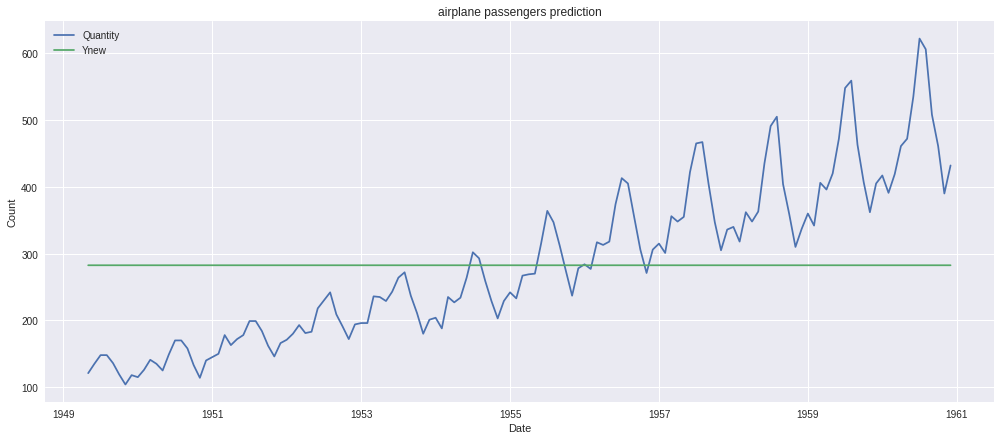

In [12]:
Ynew = model.predict(X)
df['Ynew']=Ynew

#afficher la prédiction
fig1, ax1 = plt.subplots(figsize=(17,7))
df.plot(ax=ax1,x=df.index, y=["Quantity", "Ynew"])
ax1.set_title('airplane passengers prediction')
ax1.set_ylabel('Count')
ax1.set_xlabel('Date')

plt.show()